<a href="https://colab.research.google.com/github/FanchonSora/TMC-Lab/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Given data
x_data = np.array([3, 4, 5, 7, 8, 9, 11, 12])
y_data = np.array([1.6, 3.6, 4.4, 3.4, 2.2, 2.8, 3.8, 4.6])

X = np.column_stack([
    np.ones_like(x_data),  # a0
    x_data,                # a1
    x_data**2,             # a2
    x_data**3              # a3
])

A = X.T @ X  # 4x4 matrix (XᵀX)
b = X.T @ y_data  # 4x1 vector (Xᵀy)

In [2]:
# Solve the linear system A·a = b using Gauss-Seidel
def gauss_seidel(A, b, max_iterations=1000, tolerance=1e-10):
    n = len(b)
    a = np.zeros(n)

    for iteration in range(max_iterations):
        a_new = np.copy(a)
        for i in range(n):
            sum_ = np.dot(A[i, :i], a_new[:i]) + np.dot(A[i, i+1:], a[i+1:])

            a_new[i] = (b[i] - sum_) / A[i, i]

        if np.linalg.norm(a_new - a) < tolerance:
            print(f"Gauss-Seidel converged after {iteration + 1} iterations.")
            break

        a = a_new

    return a

In [3]:
coefficients = gauss_seidel(A, b)
a0, a1, a2, a3 = coefficients

# Compute values and statistics

y_pred = a0 + a1*x_data + a2*x_data**2 + a3*x_data**3
residuals = y_data - y_pred

SSE = np.sum(residuals**2)

y_mean = np.mean(y_data)
SST = np.sum((y_data - y_mean)**2)

# R²
R_squared = 1 - (SSE / SST)

# Sy/x
n = len(x_data)
p = 4
Syx = np.sqrt(SSE / (n - p))

print("\nFitted cubic equation coefficients:")
print(f"a0 (constant term) = {a0:.6f}")
print(f"a1 (linear term)    = {a1:.6f}")
print(f"a2 (quadratic term) = {a2:.6f}")
print(f"a3 (cubic term)     = {a3:.6f}")

print("\nGoodness of fit:")
print(f"Sum of squared errors (SSE) = {SSE:.6f}")
print(f"Coefficient of determination (R²) = {R_squared:.6f}")
print(f"Standard error of estimate (Sy/x) = {Syx:.6f}")


Fitted cubic equation coefficients:
a0 (constant term) = 2.015115
a1 (linear term)    = 0.531267
a2 (quadratic term) = -0.092815
a3 (cubic term)     = 0.005390

Goodness of fit:
Sum of squared errors (SSE) = 5.141713
Coefficient of determination (R²) = 0.323459
Standard error of estimate (Sy/x) = 1.133767


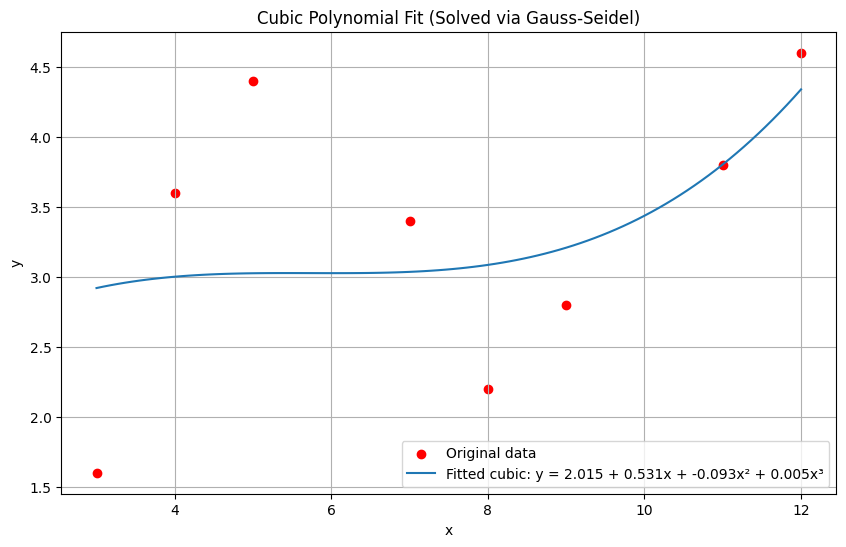

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', label='Original data')
x_smooth = np.linspace(min(x_data), max(x_data), 100)
y_smooth = a0 + a1*x_smooth + a2*x_smooth**2 + a3*x_smooth**3
plt.plot(x_smooth, y_smooth, label=f'Fitted cubic: y = {a0:.3f} + {a1:.3f}x + {a2:.3f}x² + {a3:.3f}x³')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial Fit (Solved via Gauss-Seidel)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.3, 1.5, 1.7, 1.8])
y_data = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.28, 0.18])

In [6]:
def model(x, alpha, beta):
    return alpha * x * (1 - np.exp(beta * x))

In [7]:
def compute_jacobian(x, alpha, beta):
    df_dalpha = x * (1 - np.exp(beta * x))
    df_dbeta = alpha * x**2 * np.exp(beta * x)
    return np.vstack((df_dalpha, df_dbeta)).T

In [8]:
def compute_residuals(x, y, alpha, beta):
    return y - model(x, alpha, beta)

In [9]:
def jacobi(A, b, tol=1e-6, max_iter=100):
    n = len(b)
    x = np.zeros_like(b)
    for it in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
    return x

In [10]:
def nonlinear_fit(x, y, alpha_init, beta_init, iterations=10):
    alpha, beta = alpha_init, beta_init

    for i in range(iterations):
        D = compute_residuals(x, y, alpha, beta)
        Z = compute_jacobian(x, alpha, beta)
        ZT_Z = Z.T @ Z
        ZT_D = Z.T @ D

        delta = jacobi(ZT_Z, ZT_D)

        alpha += delta[0]
        beta += delta[1]

    return alpha, beta


Estimated parameters:
  α4 = -1.52762
  β4 = 5.96930


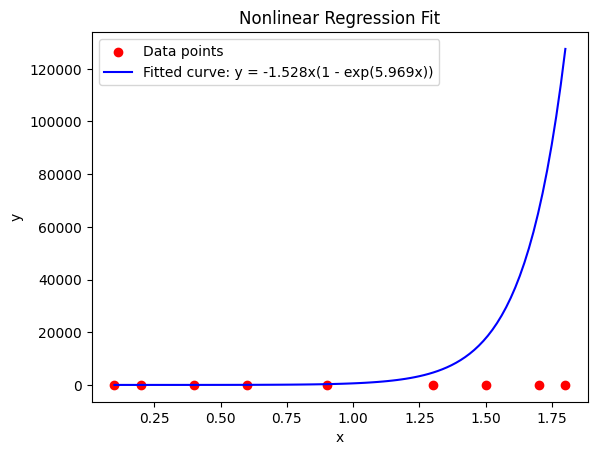

In [11]:
alpha0 = 1.0
beta0 = -1.0

alpha_est, beta_est = nonlinear_fit(x_data, y_data, alpha0, beta0)
print(f"\nEstimated parameters:\n  α4 = {alpha_est:.5f}\n  β4 = {beta_est:.5f}")

x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = model(x_plot, alpha_est, beta_est)

plt.scatter(x_data, y_data, color='red', label='Data points')
plt.plot(x_plot, y_plot, color='blue', label=f'Fitted curve: y = {alpha_est:.3f}x(1 - exp({beta_est:.3f}x))')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Regression Fit')
plt.legend()
plt.show()